# 3 Linear regression with multiple variables

In [1]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('ex1data2.txt', delimiter=',')
# Print first five rows to see what we have
print(data[:5,:])

[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]]


In [2]:
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

print(X[:5])
print(y[:5])

[[  2.10400000e+03   3.00000000e+00]
 [  1.60000000e+03   3.00000000e+00]
 [  2.40000000e+03   3.00000000e+00]
 [  1.41600000e+03   2.00000000e+00]
 [  3.00000000e+03   4.00000000e+00]]
[ 399900.  329900.  369000.  232000.  539900.]


## 3.1 Feature Normalization

In [3]:
def featureNormalise(x):
    
    """
    Returns a normalized version of x where the mean value of
    each feature is 0 and the standard deviation is 1.
    """
    x_norm = x

    # Find mean for each feature
    mu = np.mean(x, axis=0)
    # Subtract mean from data
    x_norm -= mu
    
    # Find std for each feature
    sigma = np.std(x, axis=0)
    # Divide data by std
    x_norm /= sigma
    
    return x_norm, mu, sigma

In [4]:
X, mu, sigma = featureNormalise(X)
print(X[:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [5]:
mu

array([ 2000.68085106,     3.17021277])

In [6]:
sigma

array([  7.86202619e+02,   7.52842809e-01])

In [7]:
# Add intercept term to X
X = np.column_stack((np.ones(m), X))
print(X[:5])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


## 3.2 Gradient Descent

In [8]:
theta = np.zeros((3, 1))

**Note to self**

NumPy 1D arrays are neither row vectors nor coumn vectors, they're just 1D arrays. If you have a 1D array and you want a row or column vector you have to reshape it. E.g.

```
np.shape(y)
(47,)
```

not `(47, 1)`, i.e. it's not a column vector. But

```
np.shape(np.dot(X, theta))
(47, 1)
```

If you attempt

```
np.dot(X, theta) - y
```

you'll get a 47x47 array, which you don't want. To do a row-by-row subtraction, do:

```
y = y.reshape((47,1))
np.dot(X, theta) - y
```

In [9]:
y = y.reshape((m,1))

In [10]:
def computeCostMulti(X, y, theta):
    J = 0
    m = len(y)
    
    J = 1/(2*m) * np.dot((np.dot(X, theta) - y).T, (np.dot(X, theta) - y))
    return float(J)

In [12]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    num_features = np.shape(theta)[0]
    J_history = np.zeros((num_iters, 1))
    
    for iteration in range(num_iters):
        delta = np.zeros((num_features, 1))
        for feature in range(num_features):
            for entry in range(m):
                delta[feature] += (np.dot(theta.T, X[entry,:]) - y[entry]) * X[entry, feature]
            delta[feature] = delta[feature] / m
            
        theta = theta - alpha * delta
        J_history[iteration] = computeCostMulti(X, y, theta)
      
    return theta, J_history

In [13]:
# Initialise fitting parameters and run gradient descent
alpha = 0.03
iterations = 400
theta = np.zeros((3, 1))
theta, J_history = gradientDescentMulti(X, y, theta, alpha, iterations)

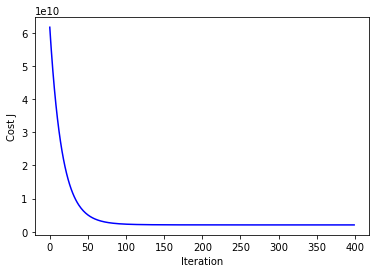

In [14]:
# Plot the convergence graph

import matplotlib.pyplot as plt

plt.plot(J_history, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.show()

In [15]:
# Result of gradient descent
print(theta)

[[ 340410.91897274]
 [ 109162.68848142]
 [  -6293.24735132]]


In [16]:
# Estimate the price of a 1650 sq-ft, 3 br house

sample_X = np.array([1650., 3.])
# Normalise data
sample_X -= mu
sample_X /= sigma
sample_X

array([-0.44604386, -0.22609337])

In [17]:
# Add intercept term
sample_X = np.insert(sample_X, 0, 1.)
sample_X

array([ 1.        , -0.44604386, -0.22609337])

In [18]:
price = float(np.dot(theta.T, sample_X))
print('Predicted price of a 1650 sq-ft, 3 br house is $%.0f.' % price)

Predicted price of a 1650 sq-ft, 3 br house is $293142.


### 3.2.1 Selecting learning rates

In [32]:
# Initialise fitting parameters and run gradient descent
iterations = 400
theta = np.zeros((3, 1))
alphas = [0.3, 0.1, 0.03, 0.01, 0.003] # Different values of learning rate, alpha, to test

J_histories = []

for alpha in alphas:
    i = alphas.index(alpha)
    J_histories.append(gradientDescentMulti(X, y, theta, alpha, iterations)[1])

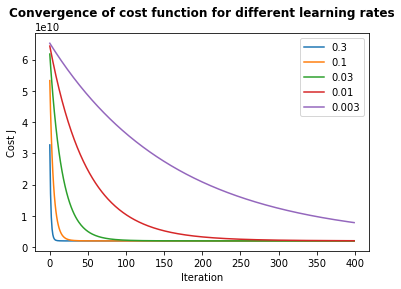

In [68]:
# Plot J versus learning rate

for i in range(len(J_histories)):
    plt.plot(J_histories[i])
plt.legend(alphas)
plt.title('Convergence of cost function for different learning rates', y = 1.05, weight='bold')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.show()

## 3.3 Normal Equations

In [71]:
# Let's show that normal eqns don't require sclaing by using unsclaed data
data = genfromtxt('ex1data2.txt', delimiter=',')

X = data[:, 0:2]
X = np.column_stack((np.ones(m), X))
y = data[:, 2]

print(X[:5])
print(y[:5])

[[  1.00000000e+00   2.10400000e+03   3.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   3.00000000e+00]
 [  1.00000000e+00   2.40000000e+03   3.00000000e+00]
 [  1.00000000e+00   1.41600000e+03   2.00000000e+00]
 [  1.00000000e+00   3.00000000e+03   4.00000000e+00]]
[ 399900.  329900.  369000.  232000.  539900.]


In [86]:
def normalEqn(X, y):
    '''
    normalEqn(X,y) computes the closed-form solution to linear 
    regression using the normal equations.
    '''
    theta = np.zeros((np.shape(X)[1], 1));
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    return theta

In [89]:
theta = normalEqn(X, y)

In [91]:
theta

array([ 89597.9095428 ,    139.21067402,  -8738.01911233])

In [95]:
# See if we get the same prediction as before for a 1650 sq-ft, 3 br house
sample_X = np.array([1650., 3.])
sample_X = np.insert(sample_X, 0, 1)

In [97]:
price = float(np.dot(theta.T, sample_X))
print('Predicted price of a 1650 sq-ft, 3 br house is $%.0f.' % price)

Predicted price of a 1650 sq-ft, 3 br house is $293081.


A few dollars off, presumably due to rounding error or something similar.